<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/regression/polynomial_regression_over_under_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다항 회귀와 과(대)적합/과소적합 이해

## 다항 회귀(Polynomial Regression) 이해
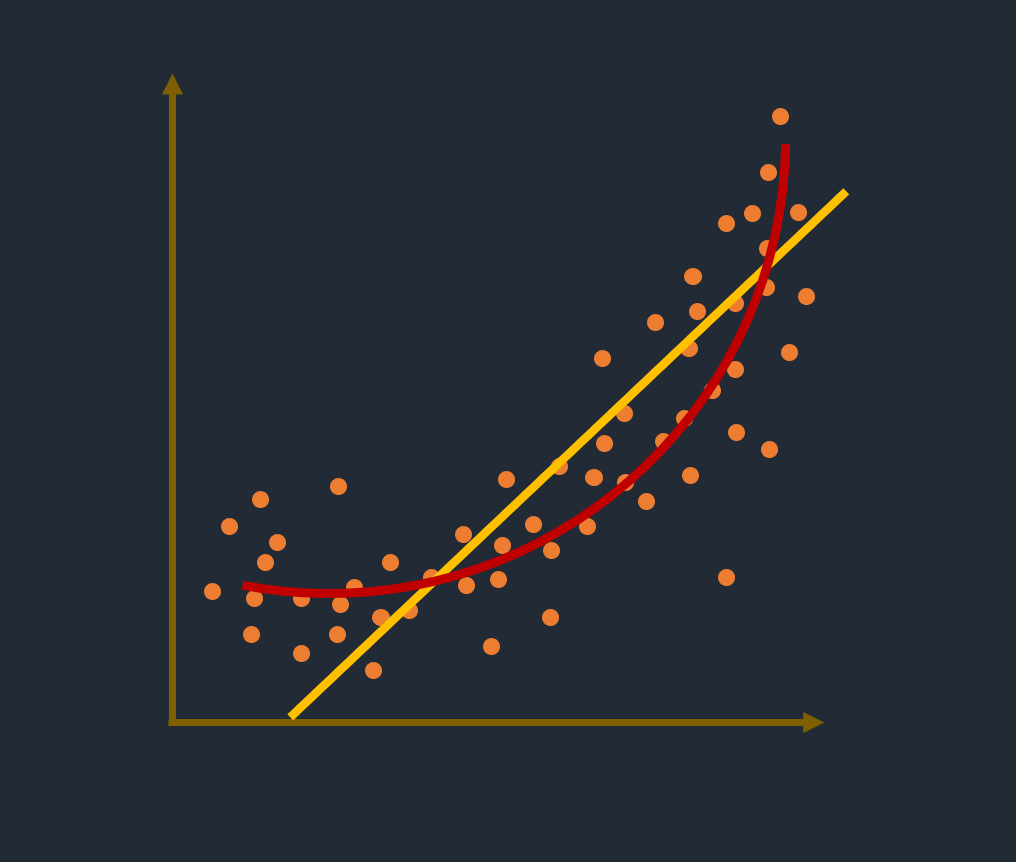

세상의 모든 관계를 직선으로만 표현할 수는 없음  
회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항회귀라고 함  

즉 다항회귀는
$$y = w_0+w_1*x_1+w_2*x_2+w_3*x_1*x_2+w_4*x^2_1+w_5*x^2_2$$ 
와 같이 표현할 수 있음  

하지만 주의해야할 것은 다항 회귀는 선형 회귀라는 것
**회귀에서 선형 회귀/비선형 회귀를 나누는 기준은**  
**회귀 계수가 선형/비선형인지를 따른것이지 독립변수의 선형/비선형 여부와는 무관함**
$$y = w_0+w_1*x_1+w_2*x_2+w_3*x_1*x_2+w_4*x^2_1+w_5*x^2_2$$ 
위의식에서 
$$새로운\;변수인\;Z\;를\; z = [x_1, x_2, x_1*x_2, x^2_1, x^2_2]$$
로 한다면 
$$y = w_0+w_1*z_1+w_2*z_2+w_3*z_3+w_4*z_4+w_5*z_5$$
로 표현할 수 있으니 선형 회귀이다.

위의 그림처럼 회귀직선으로 표현한 것보다 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높음

###사이킷런으로 코드구현하기

사이킷런에서는 다항 회귀를 위한 클래스를 제공하지 않기 때문에 비선형 함수를 선형모델에 적용시키는 방법을 사용하여 구현하겠음
 
PolynomialFeatures 클래스를 통해  피처를 Polynomial(다항식)피처로 변환  
PolynomialFeatures 클래스는 degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식피처로 변환함

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1],[2,3]]dml 2X2 godfuf todtjd
X = np.arange(4).reshape(2,2)
print("일차 단항시 계수 피처 :\n", X)

#degree = 2 인 2차다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피처 :\n", poly_ftr)



일차 단항시 계수 피처 :
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 :
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


$단항값\; [x_1,x_2]$를 $2차\;다항값\; [1,x_1,x_2,x_1^2,x_1x_2,x_2^2]$로 변환

따라서 

첫번째 입력 단항 계수 피처  
$[x_1 = 0,\; x_2= 1]$은 $[1,\;x_1 = 0\; x_2=1,\;x_1^2=0,\;x_1x_2=0,\;x_2^2=1]$형태인 $[1,0,1,0,0,1]$로 변환됨

두번째 입력 단항 계수 피처  
$[x_1 = 2,\; x_2= 3]$은 $[1,\;x_1 = 2\; x_2=3,\;x_1^2=4,\;x_1x_2=6,\;x_2^2=9]$형태인 $[1,2,3,4,6,9]$로 변환됨

3차 다항 회귀를 적용하면서 다항식 계수값이 입력되면 다항식의 값 y를 반환하는 polynomial_func()함수를 생성하겠음  
해당 함수는 간단하게 3차 다항식 값만 반환하게 생성

In [3]:
def polynomial_func(X):
  y = 1 + 2 * X + X**2 + X**3
  return y

X = np.arange(4).reshape(2,2)
print("일차 단항시 계수값 :\n", X)
y = polynomial_func(X)
print("삼차 다항시 결정값 :\n", y)

일차 단항시 계수값 :
 [[0 1]
 [2 3]]
삼차 다항시 결정값 :
 [[ 1  5]
 [17 43]]


일차 단한식 계수를 삼차 다항식 계수로 변환하고, 선형 회귀에 적용하면 다항 회귀로 구현할 수 있음

In [4]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print("3차 다항시 계수 feature :\n", poly_ftr)

#선형 회귀에 3차 다항식 계수 피처와 3차 다항식 결정 값으로 학습 후 회귀 계수확인
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(poly_ftr, y)

print("Polynomial 회귀 계수 : \n", np.round(lr.coef_,2))
print("Polynomial 회귀 Shape : \n", lr.coef_.shape)

3차 다항시 계수 feature :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 : 
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape : 
 (2, 10)


위에서 진행한 과정보다 사이킷런의 Pipeline 객체를 이용한 방법을 구현하는 것이더 명료함

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2 * X + X**2 + X**3
  return y

#Pipeline 객체로 간소하게 다항식 피처변환과 선형 회귀를 연결
model = Pipeline([("poly", PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print("Polynomial 회귀 계수 : \n",np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 : 
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


## 다항회귀를 이용한 과소적합 및 과적합 이해

다항 회귀는 피처의 직선적관계가 아닌 복잡한 다항 관계를 모델링할 수 있음  
하지만 다항식의 차수가 높아질 수록 학습데이터에만 너무 맞춘 학습이 이루어져  
정작 테스트 데이터 환경에서는 예측 정확도가 떨어짐  
**즉 차수가 높아질수록 과적합의 문제가 발생함**

피처 X와 target y가 잡음(Noise)이 포함된 다항식의 코사인(Cosine) 그래프 관계를 가지도록 만들어주고,  
이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡석과 예측 정확도를 비교하는 예제를 살펴보겠음

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환

def true_fun(X):
  return np.cos(1.5*np.pi*X)

#학습데이터는 30개의 임의의 데이터 X 그리고 X의 코아신 값에서 약간의 잡음 변동값을 더한 target y로 구성
#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X= np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

1. 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과를 비교  
2. 다항식 차수별로 학습을 수행한뒤 cross_val_score()로 MSE값을 구해 차수별 예측 성능을 평가  
3. 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선을 그리겠음  


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232058 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE는 180526263.29386473 입니다.


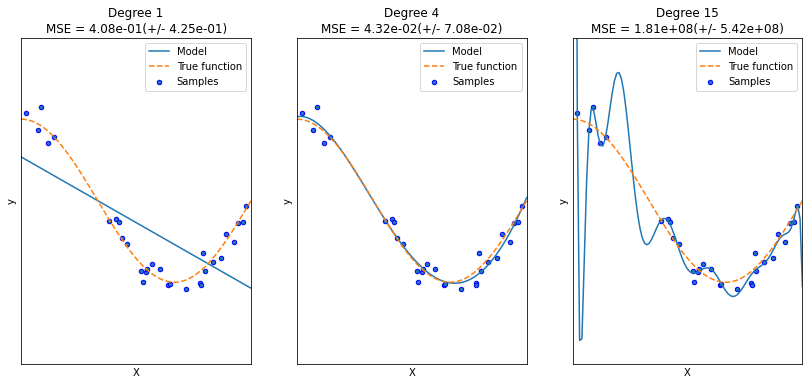

In [16]:
plt.figure(figsize=(14,6))
degrees = [1,4,15]
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  #개별 degree별로 Polynomial 변환함
  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
  lr = LinearRegression()
  pipeline = Pipeline([("polynomial_features",polynomial_features),("LinearRegression", lr)])
  pipeline.fit(X.reshape(-1,1),y)

  #교차 검증으로 다항회귀를 평가함
  scores = cross_val_score(pipeline, X.reshape(-1,1),y, scoring = 'neg_mean_squared_error', cv=10)
  #Pipeline을 구성하는 세부 객체를 접근하는 named_step["객체명"]을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['LinearRegression'].coef_
  print("\nDegree {} 회귀 계수는 {} 입니다.".format(degrees[i], np.round(coefficients,2)))
  print("Degree {} MSE는 {} 입니다.".format(degrees[i], -1*np.mean(scores)))

  #0부터 1까지 테스트 데이터를 100로 나눠 예측을 수행함
  #테스트데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제곡선을 그려서 비교함
  X_test = np.linspace(0,1,100)
  
  #예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
  #실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--',label="True function" )
  plt.scatter(X,y,edgecolor='b', s=20, label='Samples')

  plt.xlabel('X')
  plt.ylabel('y')
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc='best')
  plt.title("Degree {0}\nMSE = {1:.2e}(+/- {2:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()

위 그래프를 확인해보면 실선으로 표현된 곡선은 다항 회귀 예측 곡선이고, 점선으로 표현된 곡선은 데이터 세트 X,y의 코사인 곡선이다.  

그래프의 결과로 확인할 수 있듯이 예측한 곡선이 차수가 낮아 너무 단조로워도 과소적합의 문제가 나타날 수있고, 차수가 너무 높아 복잡하면 과적합의 문제를 보이는 것을 확인 할 수 있다.  

차수 4일때의 그래프가 가장 학습 데이터의 패턴을 잘 반영하며 복잡하지 않은 균형 잡힌 모델을 의미한다.  

## 편향-분산 트레이드오프(Bias-Variance Trade Off)
- 편향 분산 트레이드 오프는 머신러닝이 극복해야할 가장 중요한 이슈 중의 하나
- 위의 **degree=1인 모델**처럼 매우 단순한 모델을 **고편향(High Bias)*성을 가졌다고 표현함
- 위의 **degree=15인 모델**처럼 매우 복잡한 모델은 지나치게 높은 변동성을 지녀서 **고분산(High Variance)**성을 가졌다고 표현함  

일반적으로 편향과 분산은 한쪽이 높으면 한 쪽이 낮아지는 경향이 있음  
**즉 편향이 높은 분산이 낮아지고(과소적합) 분산이 높으면 편향이 낮아진다(과적합)**

오류 cost값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.  